**HEART FAILURE PREDICTION**

Context
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

*Total: **1190** observations*

*Duplicated: **272** observations*

*Final dataset: **918** observations*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install empiricaldist

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.7.5-py3-none-any.whl size=12468 sha256=b74fea3ba2db83899fedb4b9e0a4442d1c0fb0cce3a6f5fb99a29976468828fd
  Stored in directory: /root/.cache/pip/wheels/0d/d0/ae/1ad4c7593703e55b2321b23b49d3b0d55261b59d7036d7045b
Successfully built empiricaldist


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from empiricaldist import Pmf
from scipy.stats import norm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Read data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/STA301 - Bayes /heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Encode columns

In [ ]:
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})
df['ChestPainType'] = df['ChestPainType'].map({'TA': 0, 'ATA': 1, 'NAP': 2, 'ASY': 3})
df['RestingECG'] = df['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})
df['ST_Slope'] = df['ST_Slope'].map({'Up': 0, 'Flat': 1, 'Down': 2})
df

# Check dataset
print(df.head())

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           0   
1   49    0              2        160          180          0           0   
2   37    1              1        130          283          0           1   
3   48    0              3        138          214          0           0   
4   54    1              2        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         0             0  
1    156               0      1.0         1             1  
2     98               0      0.0         0             0  
3    108               1      1.5         1             1  
4    122               0      0.0         0             0  


Check correlations

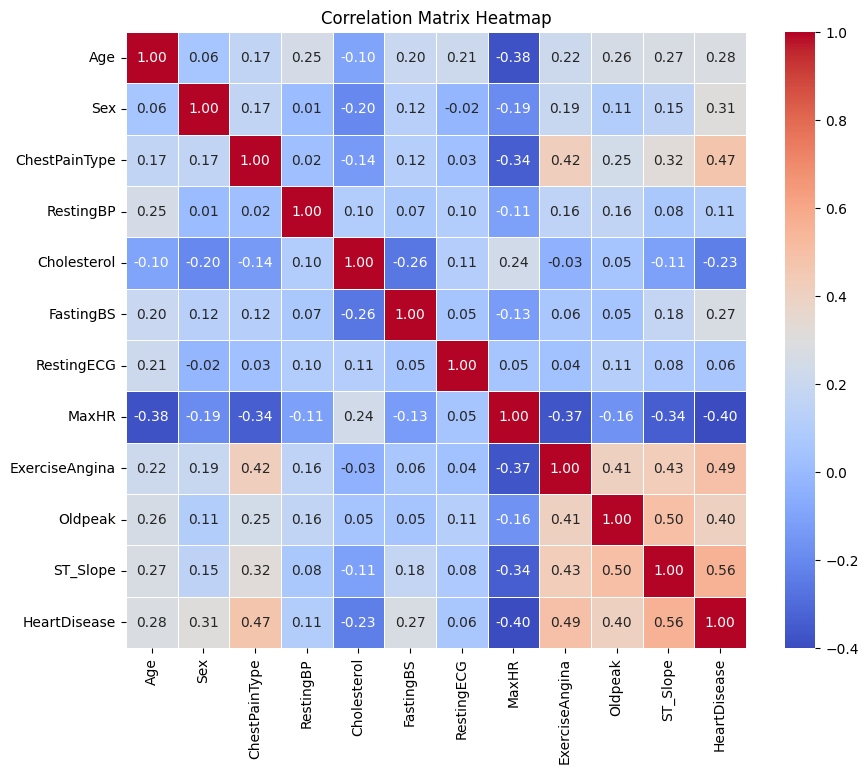

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

***Distribution***

Numerical Features

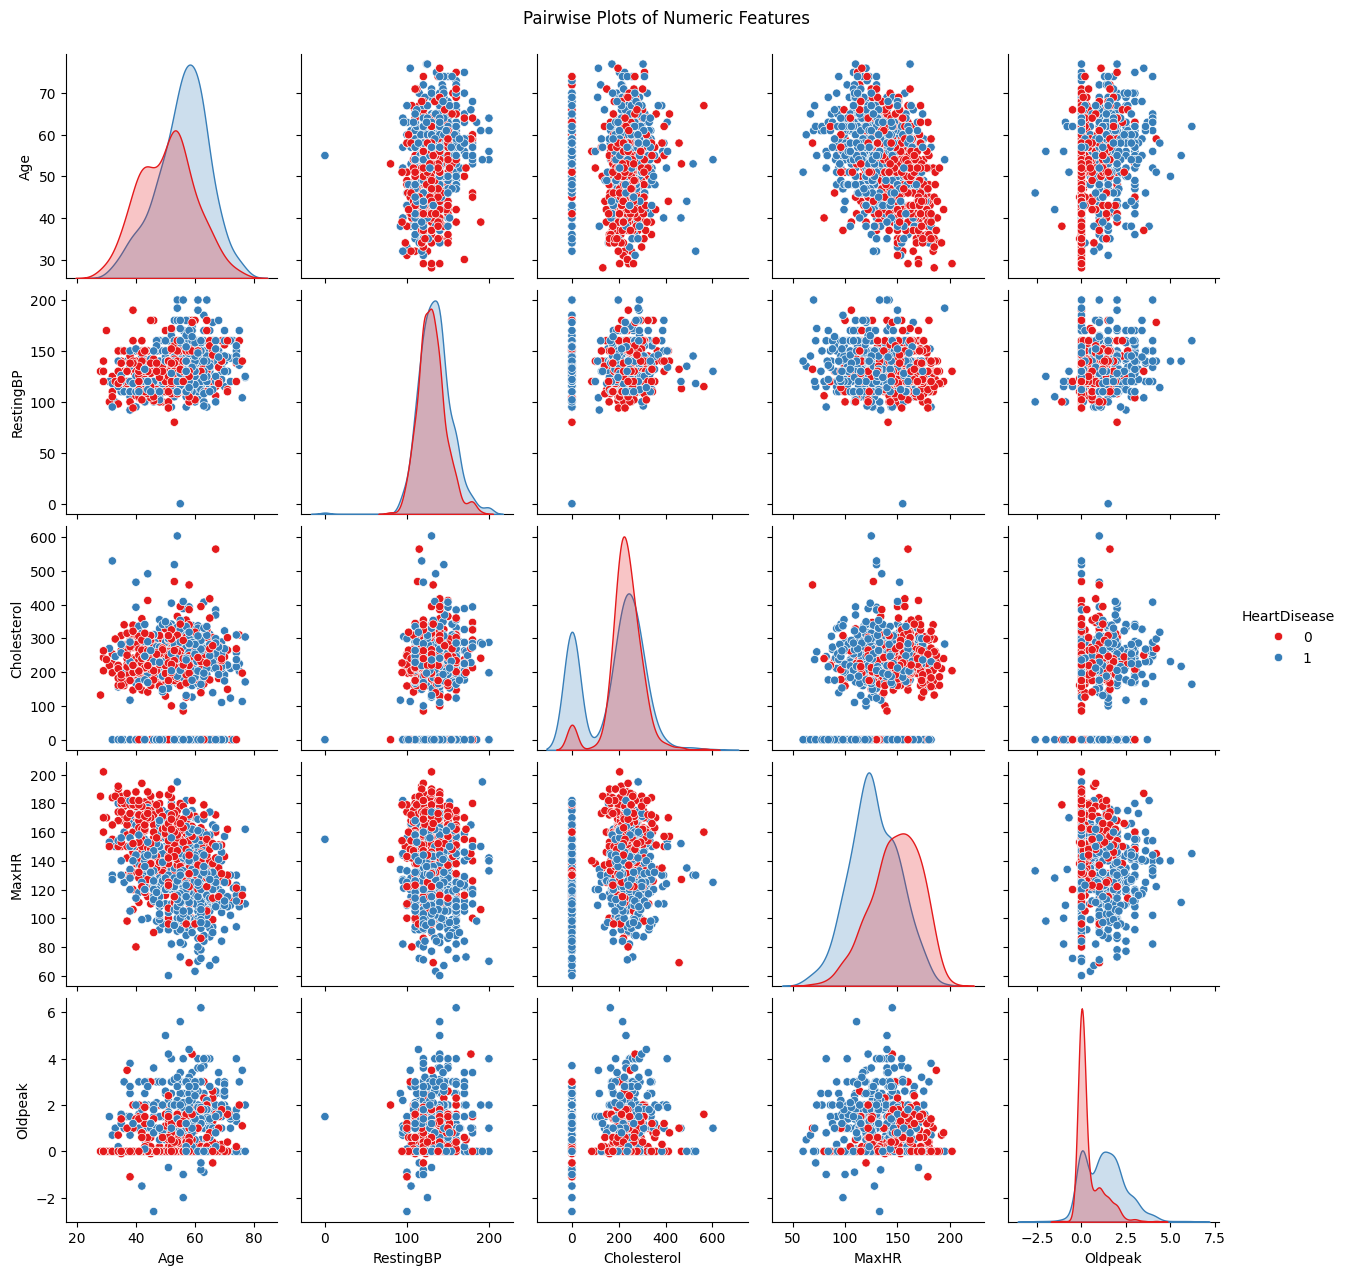

In [ ]:
# Select important numeric features for visualization
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak' ]
sns.pairplot(df, vars=numerical_features, hue='HeartDisease', diag_kind='kde', palette='Set1')

plt.suptitle("Pairwise Plots of Numeric Features", y=1.02)
plt.show()

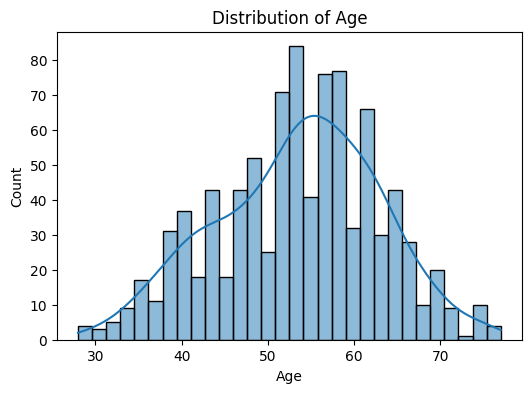

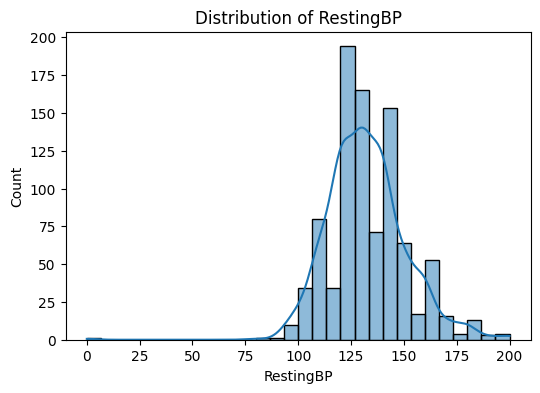

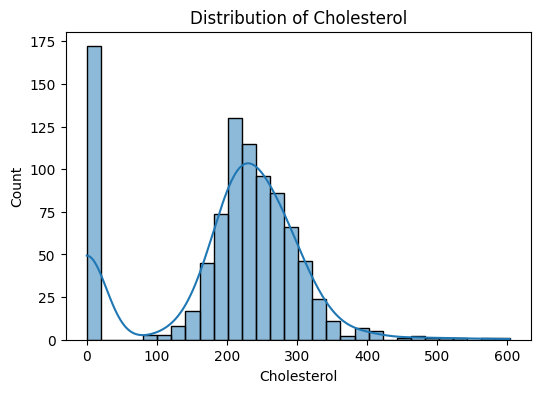

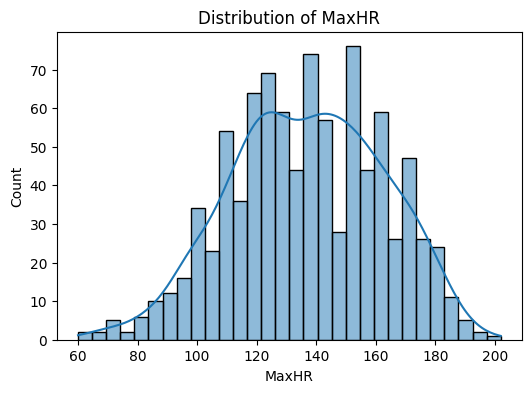

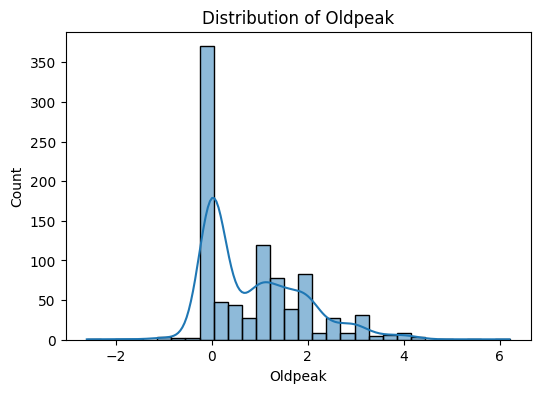

In [ ]:

for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

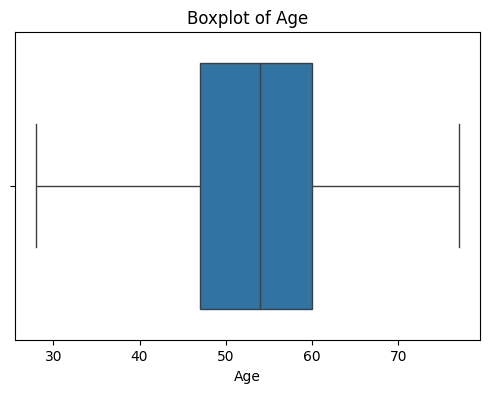

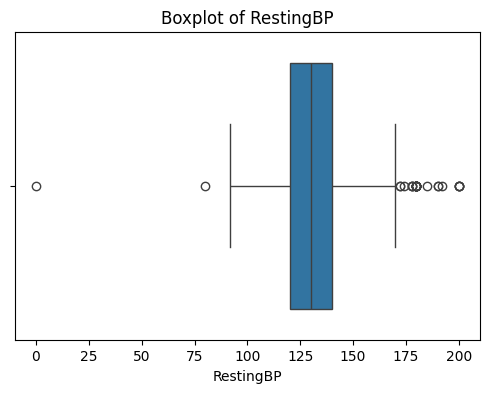

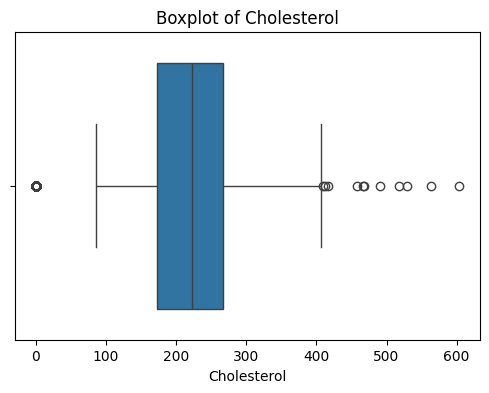

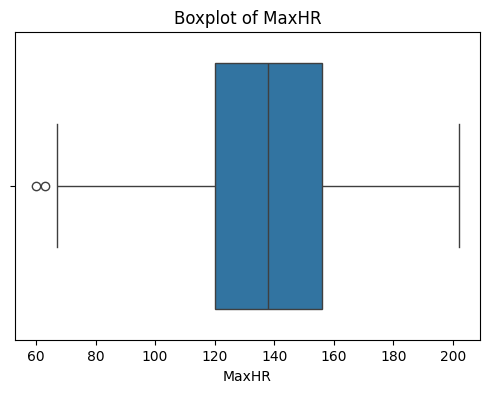

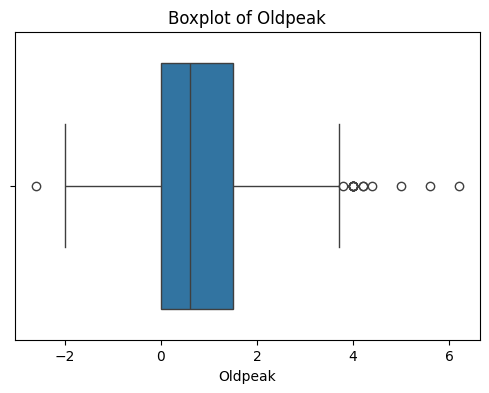

In [ ]:
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Categorical Features

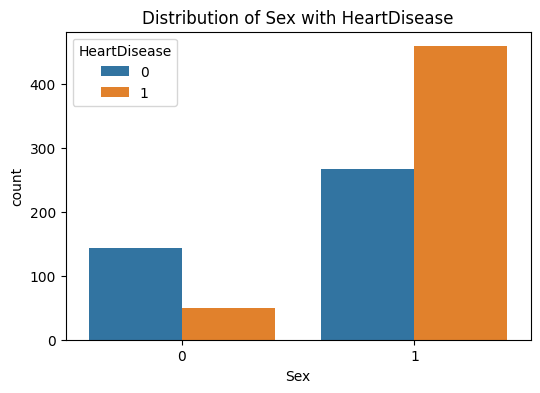

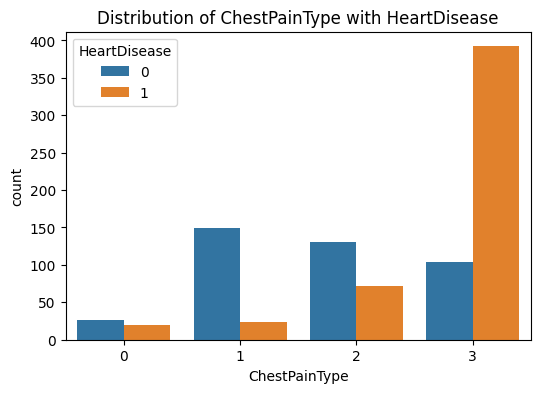

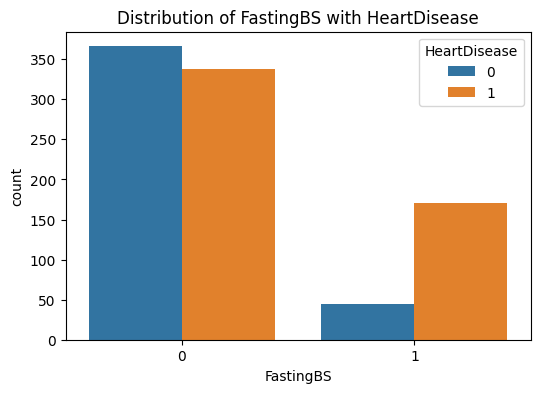

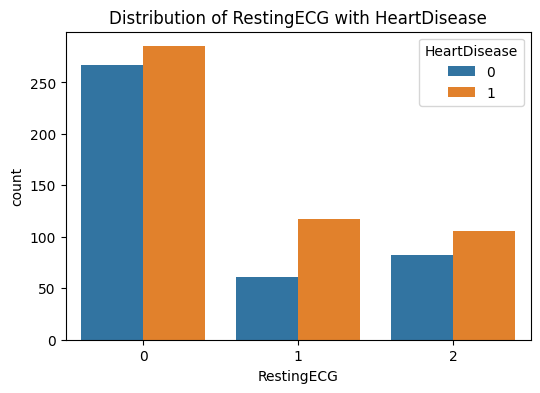

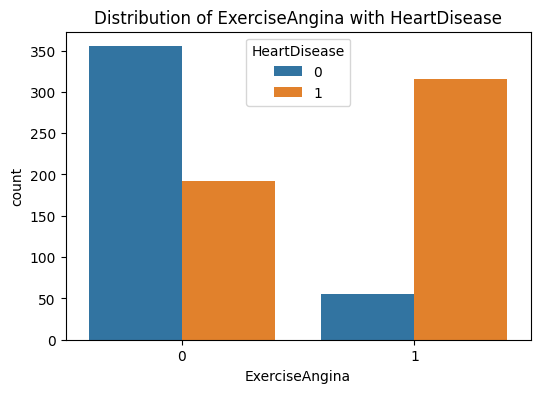

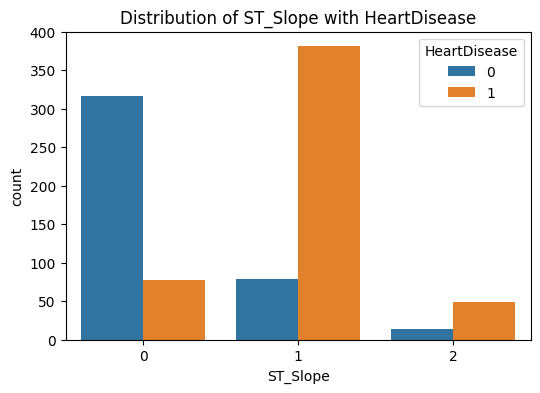

In [ ]:
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='HeartDisease')
    plt.title(f'Distribution of {col} with HeartDisease')
    plt.show()

In [ ]:
# Detect outliers using IQR
outliers = {}

for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers[feature] = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]

    print(f"{feature} - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"Number of outliers: {outliers[feature].shape[0]}")

outliers


Age - Lower Bound: 27.5, Upper Bound: 79.5
Number of outliers: 0
RestingBP - Lower Bound: 90.0, Upper Bound: 170.0
Number of outliers: 28
Cholesterol - Lower Bound: 32.625, Upper Bound: 407.625
Number of outliers: 183
MaxHR - Lower Bound: 66.0, Upper Bound: 210.0
Number of outliers: 2
Oldpeak - Lower Bound: -2.25, Upper Bound: 3.75
Number of outliers: 16


{'Age': Series([], Name: Age, dtype: int64),
 'RestingBP': 109    190
 123    180
 189    180
 190    180
 241    200
 274    180
 275    180
 278    180
 314     80
 365    200
 372    185
 399    200
 411    180
 423    180
 449      0
 475    178
 550    172
 585    180
 592    190
 673    174
 702    178
 725    180
 732    200
 759    192
 774    178
 780    180
 855    180
 880    172
 Name: RestingBP, dtype: int64,
 'Cholesterol': 28     468
 30     518
 69     412
 76     529
 103    466
       ... 
 535      0
 536      0
 616    564
 667    417
 796    409
 Name: Cholesterol, Length: 183, dtype: int64,
 'MaxHR': 370    63
 390    60
 Name: MaxHR, dtype: int64,
 'Oldpeak': 68     4.0
 166    5.0
 324   -2.6
 500    4.0
 521    4.0
 537    4.0
 559    4.0
 624    4.0
 702    4.2
 732    4.0
 771    5.6
 775    3.8
 791    4.2
 850    6.2
 900    4.4
 908    4.0
 Name: Oldpeak, dtype: float64}

In [ ]:
def remove_outliers(df, column, multiplier=1.5):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

for feature in ['Cholesterol', 'MaxHR', 'Oldpeak', 'RestingBP']:
    df = remove_outliers(df, feature)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,0,0
1,49,0,2,160,180,0,0,156,0,1.0,1,1
2,37,1,1,130,283,0,1,98,0,0.0,0,0
3,48,0,3,138,214,0,0,108,1,1.5,1,1
4,54,1,2,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,0,110,264,0,0,132,0,1.2,1,1
914,68,1,3,144,193,1,0,141,0,3.4,1,1
915,57,1,3,130,131,0,0,115,1,1.2,1,1
916,57,0,1,130,236,0,2,174,0,0.0,1,1


Cleaned dataset stats:
              Age   RestingBP  Cholesterol       MaxHR     Oldpeak
count  702.000000  702.000000   702.000000  702.000000  702.000000
mean    52.722222  131.556980   239.709402  140.549858    0.830912
std      9.535341   15.420368    50.684118   24.360985    0.959731
min     28.000000   92.000000    85.000000   71.000000   -0.100000
25%     46.000000  120.000000   206.000000  122.000000    0.000000
50%     54.000000  130.000000   235.000000  140.000000    0.400000
75%     59.000000  140.000000   272.000000  160.000000    1.500000
max     77.000000  170.000000   404.000000  202.000000    3.600000


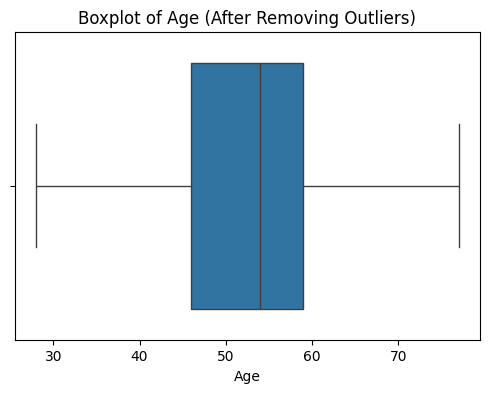

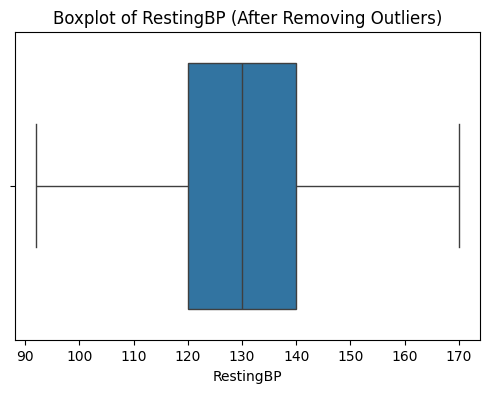

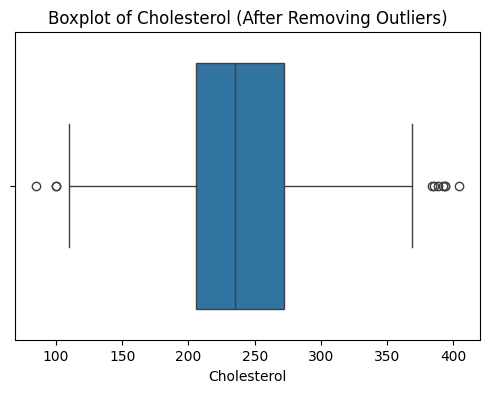

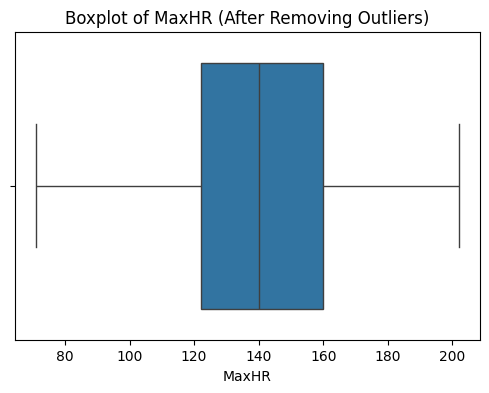

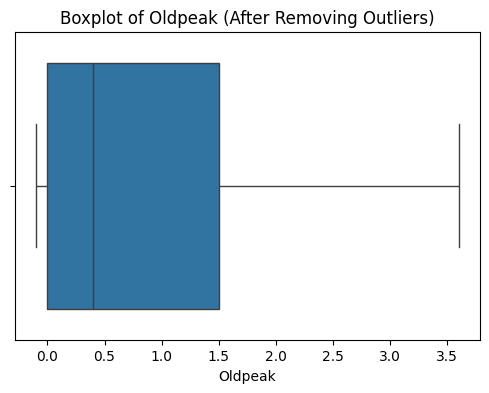

In [ ]:
print("Cleaned dataset stats:")
print(df[numerical_features].describe())

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature} (After Removing Outliers)")
    plt.show()


In [ ]:
print(df['ChestPainType'].value_counts())


ChestPainType
3    340
2    163
1    160
0     39
Name: count, dtype: int64


In [ ]:
print(df['HeartDisease'].value_counts())

HeartDisease
0    377
1    325
Name: count, dtype: int64


In [ ]:
class0 = df[df['HeartDisease'] == 0]  # No disease
class1 = df[df['HeartDisease'] == 1]  # Disease

Prior

In [ ]:
# Calculate prior probabilities
prior_class0 = len(class0) / len(df)
prior_class1 = len(class1) / len(df)

print(f"Prior P(class1): {prior_class0}")
print(f"Prior P(class0): {prior_class1}")

Prior P(class1): 0.5370370370370371
Prior P(class0): 0.46296296296296297


Likelihoods follow the Gaussian distribution
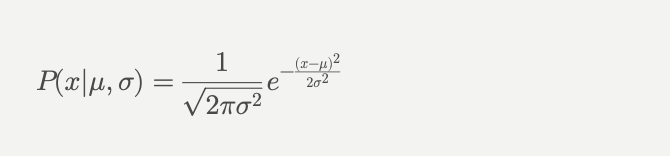

In [ ]:
def numerical_feat(feature_name, feature_value, class0, class1):
    """
    Compute the likelihood of a given feature value for two classes (0 and 1).

    Parameters:
    - feature_name (str): The name of the feature (e.g., 'Age').
    - feature_value (float): The observed value of the feature (e.g., 50).
    - class_0 (DataFrame): Subset of data where the target = 0 (No disease).
    - class_1 (DataFrame): Subset of data where the target = 1 (Disease).

    Returns:
    - likelihood_0 (float): P(Feature = feature_value | HeartDisease = 0)
    - likelihood_1 (float): P(Feature = feature_value | HeartDisease = 1)
    """
    # Calculate mean and standard deviation for the feature in each class
    mean0, std0 = class0[feature_name].mean(), class0[feature_name].std()
    mean1, std1 = class1[feature_name].mean(), class1[feature_name].std()

    # Compute likelihoods using the Gaussian PDF
    likelihood0 = norm.pdf(feature_value, mean0, std0)
    likelihood1 = norm.pdf(feature_value, mean1, std1)

    return likelihood0, likelihood1

Likelihoods follow the Categorical distribution
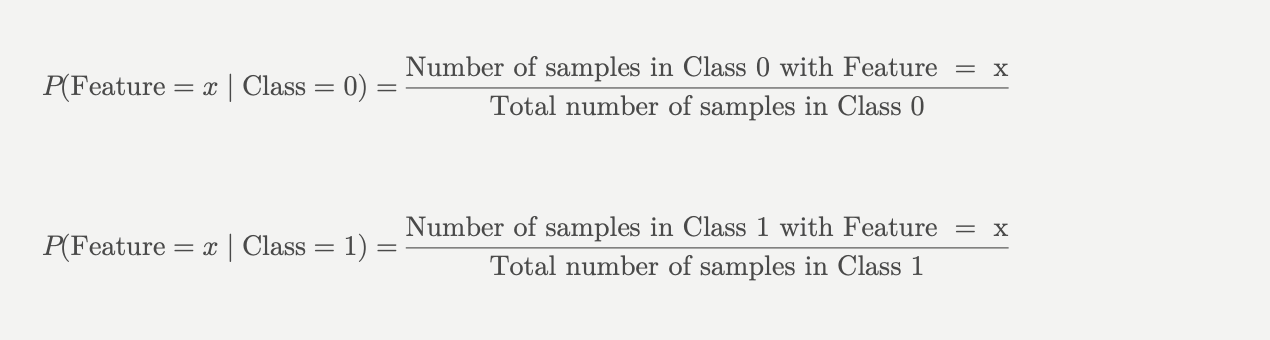

In [ ]:
def categorical_feat(feature_name, feature_value, class0, class1):
    """
    Compute the likelihood of a categorical feature value for two HeartDisease classes.

    Parameters:
    - feature_name (str): The name of the categorical feature (e.g., 'Sex').
    - feature_value (int or str): The specific value of the feature (e.g., 0 or 1 for 'Sex').
    - class_0 (DataFrame): Subset of data where HeartDisease = 0.
    - class_1 (DataFrame): Subset of data where HeartDisease = 1.

    Returns:
    - likelihood_0 (float): P(Feature = feature_value | HeartDisease = 0).
    - likelihood_1 (float): P(Feature = feature_value | HeartDisease = 1).
    """
    # Calculate likelihoods for the specified feature value
    likelihood_0 = len(class0[class0[feature_name] == feature_value]) / len(class0)
    likelihood_1 = len(class1[class1[feature_name] == feature_value]) / len(class1)

    return likelihood_0, likelihood_1

In [ ]:
def compute_posterior(data_row, priors, numerical_features, categorical_features, class0, class1):
    likelihood_0 = 1.0
    likelihood_1 = 1.0

    # Compute likelihoods for numeric features
    for feature in numerical_features:
        feature_value = data_row[feature]
        likelihood_num_0, likelihood_num_1 = numerical_feat(feature, feature_value, class0, class1)
        likelihood_0 *= likelihood_num_0
        likelihood_1 *= likelihood_num_1

    # Compute likelihoods for categorical features
    for feature in categorical_features:
        feature_value = data_row[feature]
        likelihood_cat_0, likelihood_cat_1 = categorical_feat(feature, feature_value, class0, class1)
        likelihood_0 *= likelihood_cat_0
        likelihood_1 *= likelihood_cat_1

    # Compute posteriors
    posterior_0 = priors[0] * likelihood_0
    posterior_1 = priors[1] * likelihood_1

    # Normalize
    total_posterior = posterior_0 + posterior_1
    posterior_0 /= total_posterior
    posterior_1 /= total_posterior

    return {"Posterior_Class_0": posterior_0, "Posterior_Class_1": posterior_1}

In [ ]:
priors = {'class0': prior_class0, 'class1': prior_class1} 

Age

In [ ]:
feature_name = 'Age'
feature_value = 60

likelihood_age_0, likelihood_age_1 = numerical_feat(feature_name, feature_value, class0, class1)
print(f"P(Age = {feature_value} | HeartDisease = 0): {likelihood_age_0}")
print(f"P(Age = {feature_value} | HeartDisease = 1): {likelihood_age_1}")

posterior_0 = priors['class0'] * likelihood_age_0
posterior_1 = priors['class1'] * likelihood_age_1

total_posterior = posterior_0 + posterior_1
posterior_0 /= total_posterior
posterior_1 /= total_posterior

# Display Posterior Probabilities
posteriors = {'class0': posterior_0, 'class1': posterior_1}
print(f"Posterior probabilities given Age = {feature_value}: {posteriors}")

P(Age = 60 | HeartDisease = 0): 0.024129514752604806
P(Age = 60 | HeartDisease = 1): 0.040439232793978756
Posterior probabilities given Age = 60: {'class0': 0.40903776035474126, 'class1': 0.5909622396452588}


oldpeak

In [ ]:
feature_name = 'Oldpeak'
feature_value = 1.5

likelihood_oldpeak_0, likelihood_oldpeak_1 = numerical_feat(feature_name, feature_value, class0, class1)
print(f"P(Oldpeak = {feature_value} | HeartDisease = 0): {likelihood_oldpeak_0}")
print(f"P(Oldpeak = {feature_value} | HeartDisease = 1): {likelihood_oldpeak_1}")

posterior_0 = priors['class0'] * likelihood_oldpeak_0
posterior_1 = priors['class1'] * likelihood_oldpeak_1

total_posterior = posterior_0 + posterior_1
posterior_0 /= total_posterior
posterior_1 /= total_posterior

posteriors = {'class0': posterior_0, 'class1': posterior_1}
print(f"Posterior probabilities given Oldpeak = {feature_value}: {posteriors}")

P(Oldpeak = 1.5 | HeartDisease = 0): 0.14221694722855704
P(Oldpeak = 1.5 | HeartDisease = 1): 0.39562780320776325
Posterior probabilities given Oldpeak = 1.5: {'class0': 0.29427723351475255, 'class1': 0.7057227664852473}


Sex

In [ ]:
feature_name = 'Sex'
feature_value = 1

likelihood_sex_0, likelihood_sex_1 = categorical_feat(feature_name, feature_value, class0, class1)
print(f"P(Sex = {feature_value} | HeartDisease = 0): {likelihood_sex_0}")
print(f"P(Sex = {feature_value} | HeartDisease = 1): {likelihood_sex_1}")

posterior_0 = priors['class0'] * likelihood_sex_0
posterior_1 = priors['class1'] * likelihood_sex_1


total_posterior = posterior_0 + posterior_1
posterior_0 /= total_posterior
posterior_1 /= total_posterior

posteriors = {'class0': posterior_0, 'class1': posterior_1}
print(f"Posterior probabilities given Sex = {feature_value}: {posteriors}")

P(Sex = 1 | HeartDisease = 0): 0.6392572944297082
P(Sex = 1 | HeartDisease = 1): 0.9015384615384615
Posterior probabilities given Sex = 1: {'class0': 0.451310861423221, 'class1': 0.548689138576779}


In [ ]:
feature_name = 'ChestPainType'
feature_value = 1

likelihood_CPT_0, likelihood_CPT_1 = categorical_feat(feature_name, feature_value, class0, class1)
print(f"P(CPT = {feature_value} | HeartDisease = 0): {likelihood_CPT_0}")
print(f"P(CPT = {feature_value} | HeartDisease = 1): {likelihood_CPT_1}")

posterior_0 = priors['class0'] * likelihood_CPT_0
posterior_1 = priors['class1'] * likelihood_CPT_1


total_posterior = posterior_0 + posterior_1
posterior_0 /= total_posterior
posterior_1 /= total_posterior

posteriors = {'class0': posterior_0, 'class1': posterior_1}
print(f"Posterior probabilities given ChestPainType = {feature_value}: {posteriors}")

P(CPT = 1 | HeartDisease = 0): 0.376657824933687
P(CPT = 1 | HeartDisease = 1): 0.055384615384615386
Posterior probabilities given ChestPainType = 1: {'class0': 0.8875000000000001, 'class1': 0.1125}


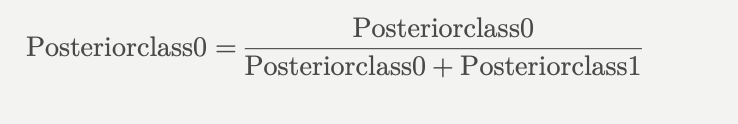

In [ ]:
# Compute posteriors for the entire dataset
df['Posterior_Class_0'] = df.apply(
    lambda x: priors['class0'] *
              np.prod([numerical_feat(feature, x[feature], class0, class1)[0] for feature in numerical_features]) *
              np.prod([categorical_feat(feature, x[feature], class0, class1)[0] for feature in categorical_features]),
    axis=1
)

df['Posterior_Class_1'] = df.apply(
    lambda x: priors['class1'] *
              np.prod([numerical_feat(feature, x[feature], class0, class1)[1] for feature in numerical_features]) *
              np.prod([categorical_feat(feature, x[feature], class0, class1)[1] for feature in categorical_features]),
    axis=1
)

# Normalize the posteriors
df['Total_Posterior'] = df['Posterior_Class_0'] + df['Posterior_Class_1']
df['Posterior_Class_0'] /= df['Total_Posterior']
df['Posterior_Class_1'] /= df['Total_Posterior']

# Predict class
df['Predicted_Class'] = (df['Posterior_Class_1'] > df['Posterior_Class_0']).astype(int)

Naive bayes model

Accuracy: 0.8581560283687943

Confusion Matrix:
[[61 10]
 [10 60]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        71
           1       0.86      0.86      0.86        70

    accuracy                           0.86       141
   macro avg       0.86      0.86      0.86       141
weighted avg       0.86      0.86      0.86       141



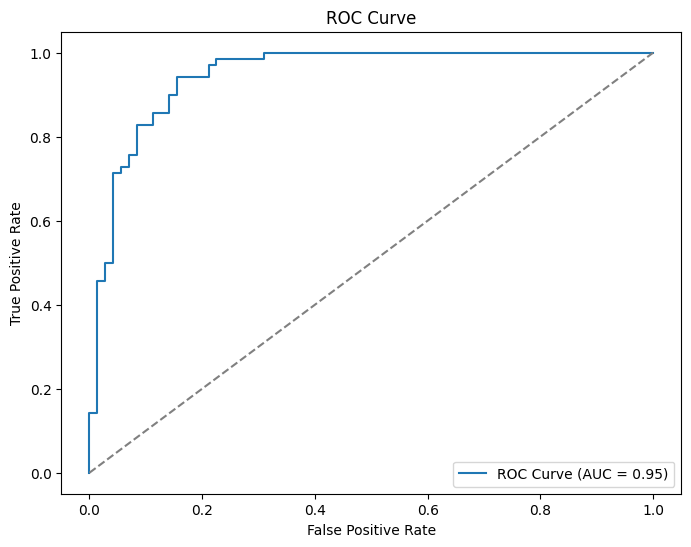

In [ ]:
X = df[numerical_features + categorical_features]
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class_0_train = X_train[y_train == 0]
class_1_train = X_train[y_train == 1]

prior_0_train = len(class_0_train) / len(X_train)
prior_1_train = len(class_1_train) / len(X_train)
priors_train = {0: prior_0_train, 1: prior_1_train}

y_pred = []
y_pred_proba = []

for _, row in X_test.iterrows():
    posterior = compute_posterior(
        data_row=row,
        priors=priors_train,
        numerical_features=numerical_features,
        categorical_features=categorical_features,
        class0=class_0_train,
        class1=class_1_train
    )
    predicted_class = 0 if posterior['Posterior_Class_0'] > posterior['Posterior_Class_1'] else 1
    y_pred.append(predicted_class)
    y_pred_proba.append(posterior['Posterior_Class_1'])

y_pred = np.array(y_pred)
y_pred_proba = np.array(y_pred_proba)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

# Compute and plot the ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

Linear Regression model

In [ ]:
X = df[numerical_features + categorical_features]
y = df['HeartDisease']  # 0 or 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred_continuous = lin_reg.predict(X_test)

# Convert continuous predictions to binary classification
# If prediction >= 0.5 => class 1, else class 0
y_pred = [1 if val >= 0.5 else 0 for val in y_pred_continuous]

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.8865248226950354
Confusion Matrix:
 [[63  8]
 [ 8 62]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        71
           1       0.89      0.89      0.89        70

    accuracy                           0.89       141
   macro avg       0.89      0.89      0.89       141
weighted avg       0.89      0.89      0.89       141



Logistic Regression model

In [ ]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)

logistic_accuracy = accuracy_score(y_test, y_pred_logistic)

logistic_conf_matrix = confusion_matrix(y_test, y_pred_logistic)

logistic_report = classification_report(y_test, y_pred_logistic)

print("Logistic Regression Accuracy:", logistic_accuracy)
print("Confusion Matrix:\n", logistic_conf_matrix)
print("Classification Report:\n", logistic_report)


Logistic Regression Accuracy: 0.8652482269503546
Confusion Matrix:
 [[61 10]
 [ 9 61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87        71
           1       0.86      0.87      0.87        70

    accuracy                           0.87       141
   macro avg       0.87      0.87      0.87       141
weighted avg       0.87      0.87      0.87       141



SVM Model

In [ ]:
X = df[numerical_features + categorical_features]
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='rbf', probability=True, random_state=42)

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("SVM Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

y_pred_proba = svm_model.predict_proba(X_test)[:, 1]

SVM Accuracy: 0.7021276595744681
Confusion Matrix:
 [[58 13]
 [29 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.82      0.73        71
           1       0.76      0.59      0.66        70

    accuracy                           0.70       141
   macro avg       0.71      0.70      0.70       141
weighted avg       0.71      0.70      0.70       141



PCA model

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95)  # This will keep enough PCs to explain 95% of the variance

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy after PCA:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)
print("Number of components retained:", pca.n_components_)

Accuracy after PCA: 0.8581560283687943
Confusion Matrix:
 [[62  9]
 [11 59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86        71
           1       0.87      0.84      0.86        70

    accuracy                           0.86       141
   macro avg       0.86      0.86      0.86       141
weighted avg       0.86      0.86      0.86       141

Number of components retained: 10


Decision Tree Model

In [ ]:
tree_model = DecisionTreeClassifier(random_state=42)

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Decision Tree Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Decision Tree Accuracy: 0.7943262411347518
Confusion Matrix:
 [[60 11]
 [18 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81        71
           1       0.83      0.74      0.78        70

    accuracy                           0.79       141
   macro avg       0.80      0.79      0.79       141
weighted avg       0.80      0.79      0.79       141



XGBoost model

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("XGBoost Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

XGBoost Accuracy: 0.8723404255319149
Confusion Matrix:
 [[62  9]
 [ 9 61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        71
           1       0.87      0.87      0.87        70

    accuracy                           0.87       141
   macro avg       0.87      0.87      0.87       141
weighted avg       0.87      0.87      0.87       141



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:12:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Example

In [ ]:

sample = X_test.iloc[1]
true_label = y_test.iloc[1]

posterior = compute_posterior(
    data_row=sample,
    priors=priors_train,
    numerical_features=numerical_features,
    categorical_features=categorical_features,
    class0=class_0_train,
    class1=class_1_train
)

predicted_class = 0 if posterior['Posterior_Class_0'] > posterior['Posterior_Class_1'] else 1

print("Sample:")
print(sample)
print("\nTrue Label:", true_label)
print("\nPosterior Probabilities:")
print(f"P(HeartDisease = 0 | Features) = {posterior['Posterior_Class_0']:.4f}")
print(f"P(HeartDisease = 1 | Features) = {posterior['Posterior_Class_1']:.4f}")
print("\nPredicted Class:", predicted_class)

Sample:
Age                52.0
RestingBP         140.0
Cholesterol       266.0
MaxHR             134.0
Oldpeak             2.0
Sex                 1.0
ChestPainType       3.0
FastingBS           0.0
RestingECG          0.0
ExerciseAngina      1.0
ST_Slope            1.0
Name: 174, dtype: float64

True Label: 1

Posterior Probabilities:
P(HeartDisease = 0 | Features) = 0.0014
P(HeartDisease = 1 | Features) = 0.9986

Predicted Class: 1
